## Load a WAV file as a mel-log spectrogram and show its shape

Shape: (128, 93, 3)
Min:  -2.071e+01
Max:   9.726e-01
Std:   5.010e+00


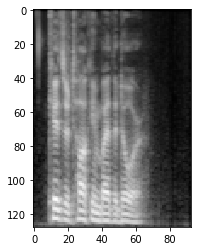

In [1]:
from spectrogram import *

import IPython.display as ipd
import matplotlib.pyplot as plt

file_name = "data/Actor_01/03-01-01-01-01-01-01.wav"
sound, sr = load_wav(file_name)
image = wav_to_image(sound, sr)

print(f"Shape: {image.shape}")
print(f"Min: {image.min():11.3e}")
print(f"Max: {image.max():11.3e}")
print(f"Std: {image.std():11.3e}")

plt.imshow(wav_to_pyplot_image(sound, sr))
plt.show()

ipd.Audio(sound, rate=sr)

## Convert the mel-log spectrogram to a WAV file and listen to it

In [2]:
sound = image_to_wav(image, sr)

ipd.Audio(sound, rate=sr)

## Convert all WAV files into mel-log spectrograms

In [3]:
import glob, os, pickle, threading, time
from tqdm.notebook import tnrange, tqdm_notebook

# Bugfix in Jupyter Lab for TQDM spacing between loop iterations
from IPython.core.display import HTML
display(HTML("""
    <style>
        .p-Widget.jp-OutputPrompt.jp-OutputArea-prompt:empty {
              padding: 0;
              border: 0;
        }
    </style>
"""))

def convert_folder(folder_name):
    for file_name in tqdm_notebook(glob.glob(f"{folder_name}\*.wav"), desc=f"{folder_name[-8:]}", leave=False):
        image_name = f"{file_name[:-4]}.pck"
    
        sound, sr = load_wav(file_name)
        image = wav_to_image(sound, sr)
        save_image(image_name, image, sr)

print("Deleting old files...")
for file_name in tqdm_notebook(glob.glob(r".\data\**\*.pck")):
    os.remove(file_name)
    
threads = []
for folder_name in glob.glob(r".\data\**"):
    threads.append(threading.Thread(target=convert_folder, args=(folder_name,)))
for folder_name in glob.glob(r".\data\audio_speech_actors_01-24\**"):
    threads.append(threading.Thread(target=convert_folder, args=(folder_name,)))

print("Constructing new files...")
for thread in tqdm_notebook(threads, desc="Folders"):
    thread.start()
    
    # Set maximum thread count to your PC's thread count
    while threading.active_count() > 12:
        time.sleep(1)

for thread in threads:
    thread.join()

Deleting old files...



Constructing new files...
